In [29]:

import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import dask.array as da
THRESHOLD = 500

img = cv2.imread('/workspaces/flora_dex/clean_data/Aquilegia caerulea/6fdf05e2-e124-4856-b1c7-ab6b835b55e2.jpeg')

print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [23]:
HLS_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

left_boundary = HLS_img[:, 0:20]
top_boundary = HLS_img[:20, :]
right_boundary = HLS_img[:, -20:]
bottom_boundary = HLS_img[-20:, :]


boundary_hues = (
    top_boundary[:, :, 0].flatten().tolist()
    + left_boundary[:, :, 0].flatten().tolist()
    + right_boundary[:, :, 0].flatten().tolist()
)

x = da.from_array(boundary_hues)

In [24]:
h,bins = da.histogram(x, bins= 256, range=[0, 256])

print(bins)


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [25]:
h = h.compute()
hue_thresholds = [i for i in range(256) if h[i] >= 500]

print (h)
print (hue_thresholds)

[  195    75   125   183   378  1090   779  1096  4705 11570 25623 26861
 13777  8612  1749  1983  1228  1240   927   842   846   717  1113  1049
   925   542   504   390   423   261   205   222   245   195   273   263
   199   178   192   318   135    63   169    56    29    34    10     3
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

(array([1.01269e+05, 9.94200e+03, 1.38600e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.30000e+01]),
 array([  0. ,  17.9,  35.8,  53.7,  71.6,  89.5, 107.4, 125.3, 143.2,
        161.1, 179. ]),
 <BarContainer object of 10 artists>)

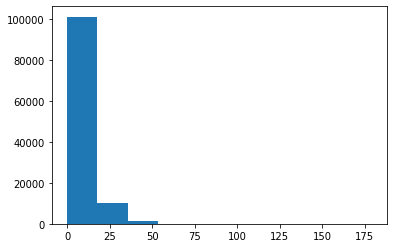

In [20]:
plt.hist(boundary_hues)

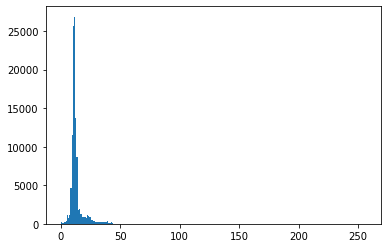

In [26]:
hist = plt.hist(boundary_hues, 256, [0, 256])

In [27]:
hue_thresholds = [i for i in range(256) if hist[0][i] >= 500]
print(hue_thresholds)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
